## Imports

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [78]:
data = pd.read_csv("student.csv", index_col=0)

df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  145 non-null    int64 
 1   Student_Age         145 non-null    int64 
 2   Sex                 145 non-null    object
 3   High_School_Type    145 non-null    object
 4   Scholarship         145 non-null    object
 5   Additional_Work     145 non-null    object
 6   Sports_activity     145 non-null    object
 7   Transportation      145 non-null    object
 8   Weekly_Study_Hours  145 non-null    int64 
 9   Attendance          145 non-null    object
 10  Reading             145 non-null    object
 11  Notes               145 non-null    object
 12  Listening_in_Class  145 non-null    object
 13  Project_work        145 non-null    object
 14  Grade               145 non-null    object
dtypes: int64(3), object(12)
memory usage: 18.1+ KB


In [79]:
categoricas = []

for columna in df.columns:
    if df[columna].dtype=='O':
        categoricas.append(columna)
        
print("Hay ", len(categoricas), " variables.")


print("Las variables categoricas son: ")
print("*"*100)
for var in categoricas:
    print(var)

Hay  12  variables.
Las variables categoricas son: 
****************************************************************************************************
Sex
High_School_Type
Scholarship
Additional_Work
Sports_activity
Transportation
Attendance
Reading
Notes
Listening_in_Class
Project_work
Grade


In [80]:
#Vemos los primeros registros de las categoricas:


df[categoricas].head()

,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
Index,,,,,,,,,,,,
0,Male,Other,50%,Yes,No,Private,Always,Yes,Yes,No,No,AA
1,Male,Other,50%,Yes,No,Private,Always,Yes,No,Yes,Yes,AA
2,Male,State,50%,No,No,Private,Never,No,No,No,Yes,AA
3,Female,Private,50%,Yes,No,Bus,Always,No,Yes,No,No,AA
4,Male,Private,50%,No,No,Bus,Always,Yes,No,Yes,Yes,AA


In [81]:
#Vemos si hay nulos:

df[categoricas].isnull().sum()


Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [82]:
#Vemos la frecuencia de los valores

for var in categoricas:
    print(df[var].value_counts())
    print("*"* 35)



Male      87
Female    58
Name: Sex, dtype: int64
***********************************
State      103
Private     25
Other       17
Name: High_School_Type, dtype: int64
***********************************
50%     76
75%     42
100%    23
25%      3
None     1
Name: Scholarship, dtype: int64
***********************************
No     96
Yes    49
Name: Additional_Work, dtype: int64
***********************************
No     87
Yes    58
Name: Sports_activity, dtype: int64
***********************************
Private    84
Bus        61
Name: Transportation, dtype: int64
***********************************
Always       98
Sometimes    25
Never        21
3             1
Name: Attendance, dtype: int64
***********************************
No     76
Yes    69
Name: Reading, dtype: int64
***********************************
Yes    77
No     66
6       2
Name: Notes, dtype: int64
***********************************
Yes    75
No     69
6       1
Name: Listening_in_Class, dtype: int64
**************

In [87]:
#Vemos la frecuencia de los valores en porcentajes

for var in categoricas:
    print(df[var].value_counts()/float(len(df)))
    print('*'*50)


Male      0.6
Female    0.4
Name: Sex, dtype: float64
**************************************************
State      0.710345
Private    0.172414
Other      0.117241
Name: High_School_Type, dtype: float64
**************************************************
50%     0.524138
75%     0.289655
100%    0.158621
25%     0.020690
None    0.006897
Name: Scholarship, dtype: float64
**************************************************
No     0.662069
Yes    0.337931
Name: Additional_Work, dtype: float64
**************************************************
No     0.6
Yes    0.4
Name: Sports_activity, dtype: float64
**************************************************
Private    0.57931
Bus        0.42069
Name: Transportation, dtype: float64
**************************************************
Always       0.675862
Sometimes    0.172414
Never        0.144828
3            0.006897
Name: Attendance, dtype: float64
**************************************************
No     0.524138
Yes    0.475862
Name: Reading

In [88]:
unique_sex_labels = df['Sex'].unique()
print(unique_sex_labels)


['Male' 'Female']


In [85]:
# for col in ['']:
#     print("*"*50)
#     print("Antes de sustitucion", col)
#     print(df[col].value_counts())
#     print("*"*50)
#     df[col] = df[col].str.strip() #Esto nos asegura que no hayan espacios al final y al principio.
#     df[col].replace('?', np.NaN, inplace=True)
#     print("Despues de sustitucion")
#     print(df[col].value_counts())

['Male' 'Female']


In [89]:
#miramos ahora sí si estan bien representados los valores


df[categoricas].isnull().sum()

Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

## Cardinalidad

In [90]:
#Vemos la frecuencia de los valores

for var in categoricas:
    print(df[var].value_counts())
    print("*"* 35)


Male      87
Female    58
Name: Sex, dtype: int64
***********************************
State      103
Private     25
Other       17
Name: High_School_Type, dtype: int64
***********************************
50%     76
75%     42
100%    23
25%      3
None     1
Name: Scholarship, dtype: int64
***********************************
No     96
Yes    49
Name: Additional_Work, dtype: int64
***********************************
No     87
Yes    58
Name: Sports_activity, dtype: int64
***********************************
Private    84
Bus        61
Name: Transportation, dtype: int64
***********************************
Always       98
Sometimes    25
Never        21
3             1
Name: Attendance, dtype: int64
***********************************
No     76
Yes    69
Name: Reading, dtype: int64
***********************************
Yes    77
No     66
6       2
Name: Notes, dtype: int64
***********************************
Yes    75
No     69
6       1
Name: Listening_in_Class, dtype: int64
**************

In [91]:
#Vemos la frecuencia de los valores en porcentajes
for var in categoricas:
    counts = df[var].value_counts()
    total = len(df)
    porcentaje = counts / total * 100
    print(porcentaje)
    print('*' * 50)

Male      60.0
Female    40.0
Name: Sex, dtype: float64
**************************************************
State      71.034483
Private    17.241379
Other      11.724138
Name: High_School_Type, dtype: float64
**************************************************
50%     52.413793
75%     28.965517
100%    15.862069
25%      2.068966
None     0.689655
Name: Scholarship, dtype: float64
**************************************************
No     66.206897
Yes    33.793103
Name: Additional_Work, dtype: float64
**************************************************
No     60.0
Yes    40.0
Name: Sports_activity, dtype: float64
**************************************************
Private    57.931034
Bus        42.068966
Name: Transportation, dtype: float64
**************************************************
Always       67.586207
Sometimes    17.241379
Never        14.482759
3             0.689655
Name: Attendance, dtype: float64
**************************************************
No     52.413793
Yes   

In [92]:
#Vemos la cardinalidad 

for var in categoricas:
    print(var, ' tiene ', len(df[var].unique()), ' etiquetas')
    
#Ojo con native_country

Sex  tiene  2  etiquetas
High_School_Type  tiene  3  etiquetas
Scholarship  tiene  5  etiquetas
Additional_Work  tiene  2  etiquetas
Sports_activity  tiene  2  etiquetas
Transportation  tiene  2  etiquetas
Attendance  tiene  4  etiquetas
Reading  tiene  2  etiquetas
Notes  tiene  3  etiquetas
Listening_in_Class  tiene  3  etiquetas
Project_work  tiene  2  etiquetas
Grade  tiene  8  etiquetas


In [93]:
numericas = []

for columna in df.columns:
    if df[columna].dtype!='O':
        numericas.append(columna)
        
print("Hay ", len(numericas), " variables.")


print("Las variables numericas son: ")
print("*"*100)
for var in numericas:
    print(var)

Hay  3  variables.
Las variables numericas son: 
****************************************************************************************************
Id
Student_Age
Weekly_Study_Hours


In [94]:
# Queremos ver como se mira el df solo con las numericas para ver si son discretas o continuas.


df[numericas].head()

#son numericas discretas

,Id,Student_Age,Weekly_Study_Hours
Index,,,
0,5001,21,0
1,5002,20,0
2,5003,21,2
3,5004,18,2
4,5005,22,12


In [95]:
df[numericas].isnull().sum()

Id                    0
Student_Age           0
Weekly_Study_Hours    0
dtype: int64

# Variable Objetivo, Set de prueba

In [96]:
 # Variable objetivo
X = df.drop(['Grade'], axis = 1)
y = df['Grade']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [98]:
#Vemos como esta la estructura


X_train.shape, X_test.shape

((101, 14), (44, 14))

## Ingenieria de caracteristicas

In [99]:
categoricas.remove("Grade")

In [100]:
categoricas

['Sex',
 'High_School_Type',
 'Scholarship',
 'Additional_Work',
 'Sports_activity',
 'Transportation',
 'Attendance',
 'Reading',
 'Notes',
 'Listening_in_Class',
 'Project_work']

In [101]:
X_train[categoricas].isnull().sum()

Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
dtype: int64

In [102]:
X_train[categoricas].head()

,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Attendance,Reading,Notes,Listening_in_Class,Project_work
Index,,,,,,,,,,,
113,Female,Other,50%,No,No,Private,Never,No,Yes,No,Yes
96,Male,State,75%,No,Yes,Bus,Sometimes,No,No,No,No
93,Male,State,None,Yes,No,Bus,Always,No,Yes,No,No
51,Female,Other,50%,Yes,Yes,Private,Always,Yes,Yes,No,No
30,Male,State,100%,Yes,Yes,Bus,Always,No,Yes,Yes,No


In [104]:
import category_encoders as ce

In [106]:
encoder = ce.OneHotEncoder(cols=['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity','Transportation', 
                                 'Attendance', 'Reading', 'Notes','Listening_in_Class','Project_work'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [107]:
X_train.head()

,Id,Student_Age,Sex_1,Sex_2,High_School_Type_1,High_School_Type_2,High_School_Type_3,Scholarship_1,Scholarship_2,Scholarship_3,...,Reading_1,Reading_2,Notes_1,Notes_2,Notes_3,Listening_in_Class_1,Listening_in_Class_2,Listening_in_Class_3,Project_work_1,Project_work_2
Index,,,,,,,,,,,,,,,,,,,,,
113,5114,21,1,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
96,5097,18,0,1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
93,5094,18,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
51,5052,19,1,0,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
30,5031,19,0,1,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1


In [108]:
X_train.shape, X_test.shape #Ahora tenemos 105 columnas

((101, 33), (44, 33))

# Escalar data

In [109]:
cols = X_train.columns

In [110]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

#La diferencia es que fit_transform ajusta los parametros en base al set de entrenamiento
#Mientras en trasnform utiliza esos mismos parametros para escalar

In [111]:
# X_train es un arreglo de numpy, lo queremos volver un dataframe de pandas.
# Lo mismo para X_test

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [112]:
X_train.head()

,Id,Student_Age,Sex_1,Sex_2,High_School_Type_1,High_School_Type_2,High_School_Type_3,Scholarship_1,Scholarship_2,Scholarship_3,...,Reading_1,Reading_2,Notes_1,Notes_2,Notes_3,Listening_in_Class_1,Listening_in_Class_2,Listening_in_Class_3,Project_work_1,Project_work_2
0,0.549296,0.666667,1.0,-1.0,1.0,-1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0
1,0.309859,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,-1.0,1.0
2,0.267606,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0
3,-0.323944,0.000000,1.0,-1.0,1.0,-1.0,0.0,1.0,0.0,0.0,...,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0
4,-0.619718,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0


# Entrenar modelo

In [113]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

# Predecir resultados

In [114]:
y_pred = gnb.predict(X_test)
y_pred

array(['Fail', 'CC', 'CB', 'DD', 'CC', 'CC', 'CC', 'CC', 'DC', 'CB', 'BA',
       'CC', 'Fail', 'Fail', 'Fail', 'CC', 'CC', 'Fail', 'DD', 'CC',
       'Fail', 'Fail', 'CB', 'CB', 'Fail', 'Fail', 'CB', 'DD', 'CC',
       'Fail', 'CC', 'Fail', 'CC', 'CC', 'CC', 'DC', 'Fail', 'Fail', 'DD',
       'BA', 'CB', 'DC', 'DD', 'Fail'], dtype='<U4')

# Ver precision

In [115]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("La precision del modelo es de: ", acc)

La precision del modelo es de:  0.13636363636363635


In [116]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['CC', 'DD', 'CB', 'CB', 'CC', 'DD', 'CB', 'CB', 'DD', 'Fail', 'DC',
       'CB', 'CC', 'Fail', 'DD', 'CC', 'Fail', 'DD', 'DC', 'DC', 'CB',
       'CC', 'Fail', 'Fail', 'Fail', 'CC', 'CC', 'Fail', 'CC', 'Fail',
       'DD', 'CC', 'DD', 'CC', 'Fail', 'DC', 'DD', 'CB', 'Fail', 'CC',
       'Fail', 'Fail', 'CC', 'BA', 'Fail', 'CC', 'CC', 'CC', 'Fail',
       'Fail', 'DC', 'CB', 'DD', 'CC', 'DD', 'DC', 'CB', 'CB', 'DD', 'CC',
       'CB', 'CB', 'BB', 'DD', 'Fail', 'CC', 'BA', 'BA', 'DD', 'CC', 'BA',
       'CB', 'CC', 'DD', 'CC', 'BA', 'CC', 'Fail', 'Fail', 'Fail', 'CC',
       'CC', 'Fail', 'DC', 'DD', 'CC', 'DD', 'Fail', 'DC', 'Fail', 'DD',
       'DC', 'DC', 'DD', 'CB', 'CC', 'Fail', 'DD', 'DD', 'Fail', 'CC'],
      dtype='<U4')

In [117]:
acc = accuracy_score(y_train , y_pred_train)

print("La precision del modelo es de: ", acc)

La precision del modelo es de:  0.31683168316831684


# Matriz de confusion

In [118]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('Verdadetos Positivos / True Positives(TP) = ', cm[0,0])

print('Verdaderos Negativos /True Negatives(TN) = ', cm[1,1])

print('Falsos Positivos / False Positives(FP) = ', cm[0,1])

print('Falsos Negativos / False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[0 2 0 3 6 0 0 2]
 [0 0 0 0 1 1 0 5]
 [0 0 0 1 2 0 1 2]
 [0 0 0 0 1 0 0 1]
 [0 0 0 0 2 2 1 0]
 [0 0 0 0 1 0 2 1]
 [0 0 0 2 1 0 1 0]
 [0 0 0 0 0 0 0 3]]
Verdadetos Positivos / True Positives(TP) =  0
Verdaderos Negativos /True Negatives(TN) =  0
Falsos Positivos / False Positives(FP) =  2
Falsos Negativos / False Negatives(FN) =  0


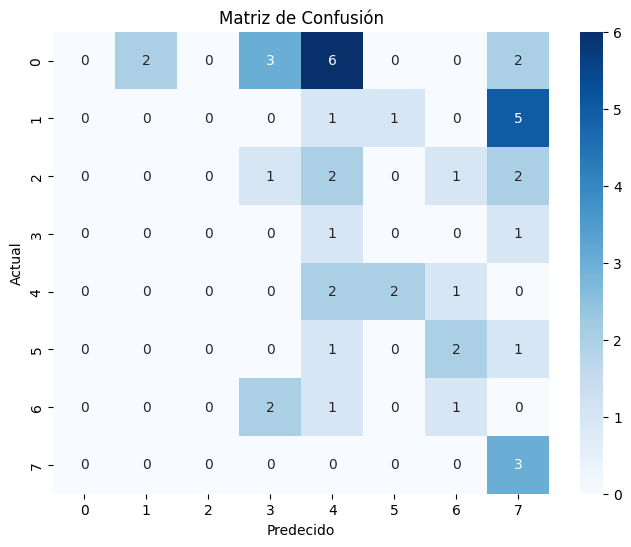

In [120]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders['Grade'].classes_, yticklabels=label_encoders['Grade'].classes_)
plt.xlabel('Predecido')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AA       0.00      0.00      0.00        13
          BA       0.00      0.00      0.00         7
          BB       0.00      0.00      0.00         6
          CB       0.00      0.00      0.00         2
          CC       0.14      0.40      0.21         5
          DC       0.00      0.00      0.00         4
          DD       0.20      0.25      0.22         4
        Fail       0.21      1.00      0.35         3

    accuracy                           0.14        44
   macro avg       0.07      0.21      0.10        44
weighted avg       0.05      0.14      0.07        44



/home/arg/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arg/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arg/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Probabilidades

In [122]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[7.96891509e-21, 0.00000000e+00, 1.08504238e-22, 6.17678028e-13,
        3.40779434e-15, 1.01431878e-21, 0.00000000e+00, 1.00000000e+00],
       [1.51027212e-07, 6.50686499e-04, 2.71692926e-07, 0.00000000e+00,
        9.99243708e-01, 7.04396445e-07, 1.04478753e-04, 0.00000000e+00],
       [3.22993521e-07, 1.29372696e-05, 8.83289393e-08, 9.99985682e-01,
        0.00000000e+00, 3.72953801e-07, 5.96664493e-07, 0.00000000e+00],
       [3.09163878e-09, 4.16269381e-08, 2.22666329e-08, 0.00000000e+00,
        2.85439748e-02, 1.06856372e-03, 9.70387395e-01, 0.00000000e+00],
       [3.25522100e-12, 7.43907638e-08, 2.37142652e-09, 5.95251776e-05,
        7.44406483e-01, 1.00255007e-01, 1.55278908e-01, 0.00000000e+00],
       [1.55609773e-11, 4.73109763e-05, 9.18373813e-13, 0.00000000e+00,
        8.41305219e-01, 0.00000000e+00, 1.58647470e-01, 0.00000000e+00],
       [3.37171323e-09, 8.55868011e-04, 3.25089351e-09, 0.00000000e+00,
        9.98383277e-01, 0.00000000e+00, 7.60848421e-04, 0.

In [58]:
df['Scholarship'] = df['Scholarship'].replace('None', 0)
df['Scholarship'] = df['Scholarship'].str.rstrip('%')
# Definir diccionarios de mapeo para codificación ordinal

sex_mapping = {'Male': 0, 'Female': 1}
high_school_mapping = {'Private': 0, 'State': 1, 'Other': 2}
additional_work_mapping = {'No': 0, 'Yes': 1}
sports_activity_mapping = {'No': 0, 'Yes': 1}
attendance_mapping = {'Always': 2, 'Sometimes': 1, 'Never': 0}
reading_mapping = {'No': 0, 'Yes': 1}
notes_mapping = {'No': 0, 'Yes': 1}
listening_mapping = {'No': 0, 'Yes': 1}
project_work_mapping = {'No': 0, 'Yes': 1}
transportation_mapping = {'Private': 0, 'Bus': 1}   
grade_mapping = {
    'AA': 7,
    'BA': 6,
    'BB': 5,
    'CB': 4,
    'CC': 3,
    'DC': 2,
    'DD': 1,
    'Fail': 0
}



# Aplicar codificación ordinal a las variables categóricas
df['Sex'] = df['Sex'].map(sex_mapping)
df['High_School_Type'] = df['High_School_Type'].map(high_school_mapping)
df['Additional_Work'] = df['Additional_Work'].map(additional_work_mapping)
df['Sports_activity'] = df['Sports_activity'].map(sports_activity_mapping)
df['Attendance'] = df['Attendance'].map(attendance_mapping)
df['Reading'] = df['Reading'].map(reading_mapping)
df['Notes'] = df['Notes'].map(notes_mapping)
df['Listening_in_Class'] = df['Listening_in_Class'].map(listening_mapping)
df['Project_work'] = df['Project_work'].map(project_work_mapping)
df['Transportation'] = df['Transportation'].map(transportation_mapping)
df['Grade'] = df['Grade'].map(grade_mapping)

# Convertir todas las columnas a tipo float
df = df.astype(float)

# Verificar el DataFrame con las variables categóricas codificadas como floats
print(df.head())


           Id  Student_Age  Sex  High_School_Type  Scholarship  \
Index                                                            
0      5001.0         21.0  0.0               2.0         50.0   
1      5002.0         20.0  0.0               2.0         50.0   
2      5003.0         21.0  0.0               1.0         50.0   
3      5004.0         18.0  1.0               0.0         50.0   
4      5005.0         22.0  0.0               0.0         50.0   

       Additional_Work  Sports_activity  Transportation  Weekly_Study_Hours  \
Index                                                                         
0                  1.0              0.0             0.0                 0.0   
1                  1.0              0.0             0.0                 0.0   
2                  0.0              0.0             0.0                 2.0   
3                  1.0              0.0             1.0                 2.0   
4                  0.0              0.0             1.0        

## EDA


In [59]:
df.head()

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
Index,,,,,,,,,,,,,,,
0,5001.0,21.0,0.0,2.0,50.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,7.0
1,5002.0,20.0,0.0,2.0,50.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,7.0
2,5003.0,21.0,0.0,1.0,50.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,7.0
3,5004.0,18.0,1.0,0.0,50.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,7.0
4,5005.0,22.0,0.0,0.0,50.0,0.0,0.0,1.0,12.0,2.0,1.0,0.0,1.0,1.0,7.0


In [60]:
#Vemos estructura de datos.

print("La data tiene: ", df.shape[0], " filas y ", df.shape[1], " columnas")

La data tiene:  145  filas y  15  columnas


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  145 non-null    float64
 1   Student_Age         145 non-null    float64
 2   Sex                 145 non-null    float64
 3   High_School_Type    145 non-null    float64
 4   Scholarship         144 non-null    float64
 5   Additional_Work     145 non-null    float64
 6   Sports_activity     145 non-null    float64
 7   Transportation      145 non-null    float64
 8   Weekly_Study_Hours  145 non-null    float64
 9   Attendance          144 non-null    float64
 10  Reading             145 non-null    float64
 11  Notes               143 non-null    float64
 12  Listening_in_Class  144 non-null    float64
 13  Project_work        145 non-null    float64
 14  Grade               145 non-null    float64
dtypes: float64(15)
memory usage: 18.1 KB


## Naive Bayes

In [36]:
# Crear un DataFrame con los datos proporcionados

# Codificar variables categóricas
label_encoders = {}
categorical_columns = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']

for column in categorical_columns:
	label_encoders[column] = LabelEncoder()
	df[column] = label_encoders[column].fit_transform(df[column])

# Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(['Id', 'Grade'], axis=1)
y = df['Grade']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy*100:_.2f}%")

Precisión del modelo: 24.14%


## Overfitting

In [46]:
# Leer los datos de prueba
test_data = pd.read_csv('student.csv')

# Reemplazar 'None' con 0 en la columna 'Scholarship'
test_data['Scholarship'] = test_data['Scholarship'].replace('None', 0)

# Eliminar el símbolo '%' en la columna 'Scholarship' y convertir a float
test_data['Scholarship'] = test_data['Scholarship'].str.rstrip('%').astype(float)

# Definir diccionarios de mapeo para codificación ordinal
sex_mapping = {'Male': 0, 'Female': 1}
high_school_mapping = {'Private': 0, 'State': 1, 'Other': 2}
additional_work_mapping = {'No': 0, 'Yes': 1}
sports_activity_mapping = {'No': 0, 'Yes': 1}
attendance_mapping = {'Always': 2, 'Sometimes': 1, 'Never': 0}
reading_mapping = {'No': 0, 'Yes': 1}
notes_mapping = {'No': 0, 'Yes': 1}
listening_mapping = {'No': 0, 'Yes': 1}
project_work_mapping = {'No': 0, 'Yes': 1}
transportation_mapping = {'Private': 0, 'Bus': 1}
grade_mapping = {
    'AA': 7, 'BA': 6, 'BB': 5, 'CB': 4,
    'CC': 3, 'DC': 2, 'DD': 1, 'Fail': 0
}

# Aplicar codificación ordinal a las variables categóricas
test_data['Sex'] = test_data['Sex'].map(sex_mapping)
test_data['High_School_Type'] = test_data['High_School_Type'].map(high_school_mapping)
test_data['Additional_Work'] = test_data['Additional_Work'].map(additional_work_mapping)
test_data['Sports_activity'] = test_data['Sports_activity'].map(sports_activity_mapping)
test_data['Attendance'] = test_data['Attendance'].map(attendance_mapping)
test_data['Reading'] = test_data['Reading'].map(reading_mapping)
test_data['Notes'] = test_data['Notes'].map(notes_mapping)
test_data['Listening_in_Class'] = test_data['Listening_in_Class'].map(listening_mapping)
test_data['Project_work'] = test_data['Project_work'].map(project_work_mapping)
test_data['Transportation'] = test_data['Transportation'].map(transportation_mapping)
test_data['Grade'] = test_data['Grade'].map(grade_mapping)

# Reemplazar NaN con -1 en el DataFrame de prueba
test_data.fillna(-1, inplace=True)

# Convertir todas las columnas a tipo float
test_data = test_data.astype(float)

# Importar label_encoders y categorical_columns desde un código previo
# Definir variables predictoras (X_test) y variable objetivo (Y_test)
X_test = test_data.drop(['Index', 'Id', 'Grade'], axis=1)
Y_test = test_data['Grade']

# Realizar predicciones en el conjunto de prueba
Y_pred_test = model.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print("Precisión del modelo en el conjunto de prueba:", accuracy_test)

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(Y_test, Y_pred_test, zero_division=0))

Precisión del modelo en el conjunto de prueba: 0.06206896551724138

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.00      0.00      0.00        17
         2.0       0.00      0.00      0.00        13
         3.0       0.00      0.00      0.00        17
         4.0       0.06      0.90      0.12        10
         5.0       0.00      0.00      0.00        21
         6.0       0.00      0.00      0.00        24
         7.0       0.00      0.00      0.00        35

    accuracy                           0.06       145
   macro avg       0.01      0.11      0.01       145
weighted avg       0.00      0.06      0.01       145

